The purpose of this notebook is to assess the performance of `AMBER` netcdf read/write operations in the `MDAnalysis` package as it pertains to the decision to replace `netCDF4` with `scipy.io.netcdf`

**CAUTION**:
Need to restart the Jupyter notebook kernel when swapping between different MDAnalysis builds, so the results shown below are actually produced with a workflow that involves "switching" kernels when needed for different MDAnalysis versions.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy
import MDAnalysis
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#distributing these files in the github repo as well to make the notebook a bit more universal 
amber_top = 'bala.prmtop'
amber_ncdf = 'bala.ncdf'

In [3]:
def test_read_ncdf(top = amber_top, traj = amber_ncdf):
    u = MDAnalysis.Universe(top, traj)
    
def test_write_ncdf(universe):
    all_selection = universe.select_atoms('all')
    with MDAnalysis.Writer('dummy.ncdf', all_selection.n_atoms) as W:
        for ts in universe.trajectory:
            W.write(all_selection)

In [4]:
%timeit -n 10 -r 5 test_read_ncdf() #scipy ncdf file reading -- scipy-ncdf-debug branch, commit hash: 565aa0

10 loops, best of 5: 118 ms per loop


In [4]:
%timeit -n 10 -r 5 test_read_ncdf() #netCDF4 ncdf file reading -- develop branch commit hash: aac24f9

10 loops, best of 5: 30.1 ms per loop


In [4]:
%%timeit -n 10 -r 5 u = MDAnalysis.Universe(amber_top, amber_ncdf)
test_write_ncdf(u) #netCDF4 ncdf file writing -- develop branch commit hash: aac24f9

10 loops, best of 5: 41.5 ms per loop


In [6]:
%%timeit -n 10 -r 5 u = MDAnalysis.Universe(amber_top, amber_ncdf)
test_write_ncdf(u) #scipy ncdf file writing -- scipy-ncdf-debug commit hash: 565aa0

10 loops, best of 5: 39.6 ms per loop


<IPython.core.display.Javascript object>


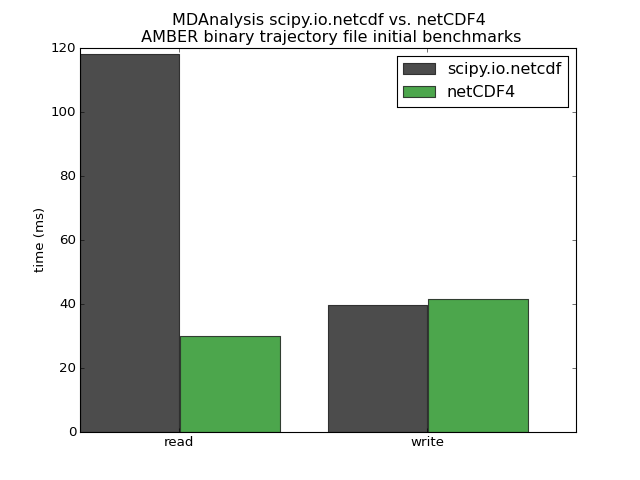

In [7]:
#produce summary plot of initial benchmarks:
fig_summary = plt.figure()
ax = fig_summary.add_subplot(111)
scipy_ncdf = [118, 39.6]
netcdf4 = [30.1, 41.5]
width = 0.4
ax.bar([1,2], scipy_ncdf, width = width, label = 'scipy.io.netcdf', color = 'black', alpha = 0.7)
ax.bar([1.405,2.405], netcdf4, width = width, label = 'netCDF4', color = 'green', alpha = 0.7)
ax.set_ylabel('time (ms)')
ax.set_xticks([1.4,2.4])
ax.set_xticklabels(('read', 'write'))
ax.legend(loc=1)
ax.set_title('MDAnalysis scipy.io.netcdf vs. netCDF4\n AMBER binary trajectory file initial benchmarks')
fig_summary.savefig('summary.png', dpi = 300)